In this project we take data of Airbnb listings in the US and try to predict the price of stay in that listing.
The source of the dataset:
https://www.kaggle.com/stevezhenghp/airbnb-price-prediction#train.csv

The data includes 74411 listings and 29 columns - including log_price, what we are trying to predict.

There was no information about this data so we assume that since all the listings are in the US, the price (or log_price) that we are trying to predict is the general pricing per 1 night stay of the listing, in USD.


In [74]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import pickle

In [75]:
warnings.filterwarnings('ignore')

In [76]:
df=pd.read_csv('/content/drive/MyDrive/PROJECTS DS/AIRBNB/train.csv')

### Data Exploration

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [78]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [79]:
df.duplicated().sum()

0

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01


In [81]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

### Null Values check

In [82]:
df.isna().sum()[df.isna().sum()>0]

bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

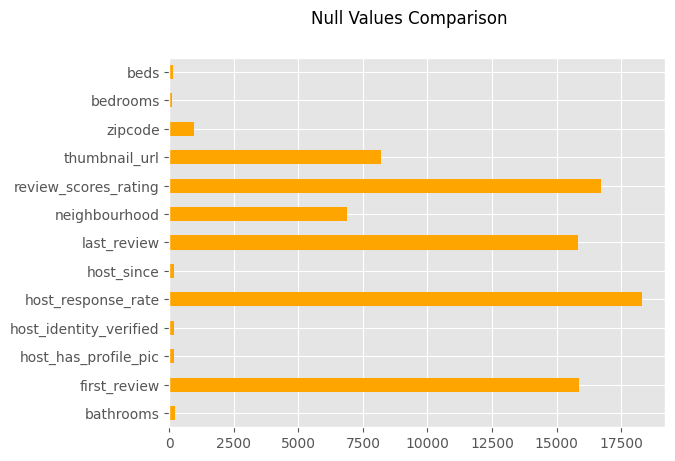

In [83]:
plt.style.use('ggplot')
df.isna().sum()[df.isna().sum()>0].plot.barh(color='orange')
plt.suptitle('Null Values Comparison')
plt.show()

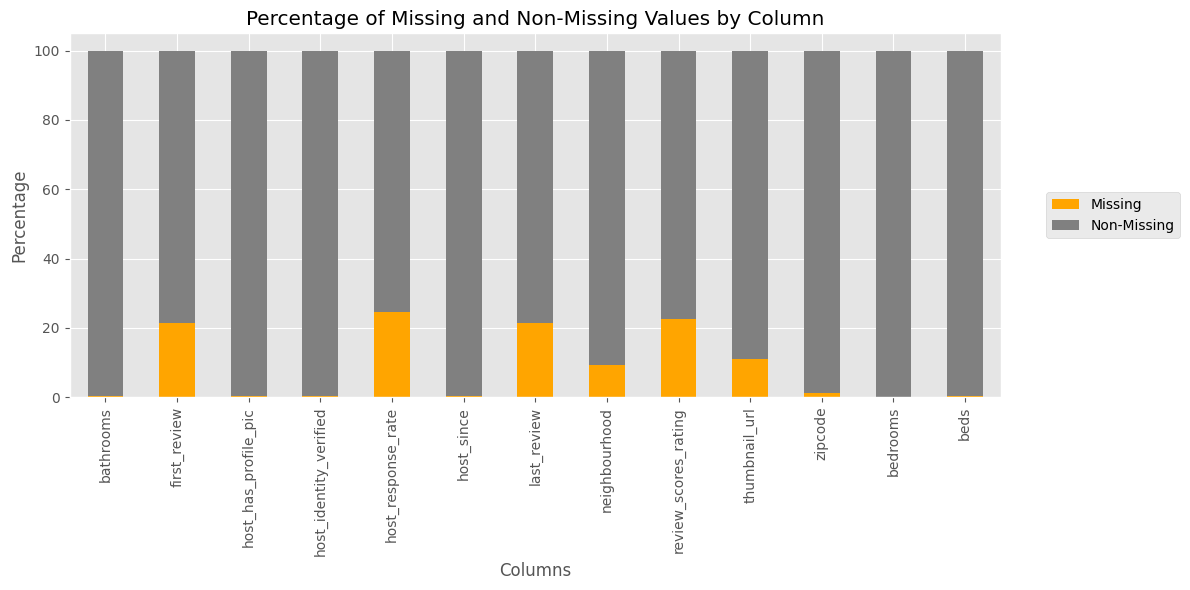

In [84]:
missing_percentage = df.isna().mean()[df.isna().mean()>0] * 100

non_missing_percentage = 100 - missing_percentage
percentages = pd.DataFrame({'Missing': missing_percentage, 'Non-Missing': non_missing_percentage})

ax = percentages.plot(kind='bar', stacked=True, color=['orange', 'grey'], figsize=(12, 6))

plt.title('Percentage of Missing and Non-Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')

plt.legend(loc='center right',bbox_to_anchor=(1.2,0.5))

plt.tight_layout()
plt.show()

neighbourhood vs price
amenities vs price
zipcode vs price

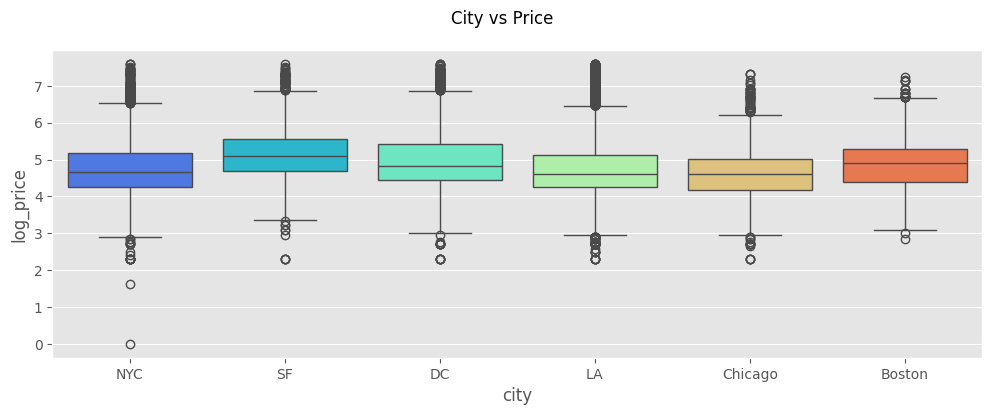

In [85]:
plt.figure(figsize=(12,4))

sns.boxplot(data=df,y='log_price',x='city',palette='rainbow')
plt.suptitle('City vs Price')
plt.savefig('City vs Price Distribution.jpeg')
plt.show()

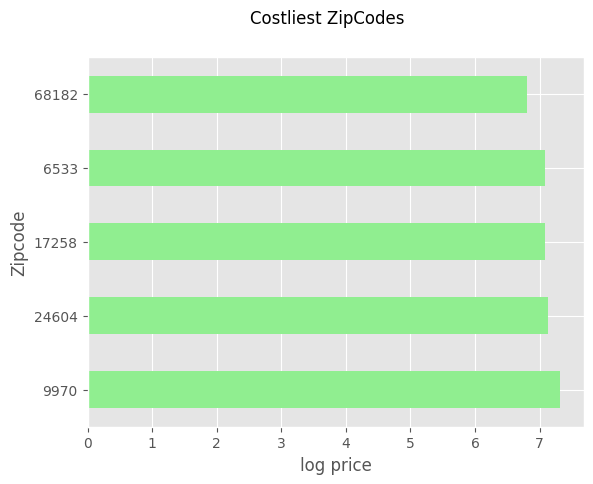

In [86]:
df.groupby('zipcode')['log_price'].transform(lambda x:np.mean(x)).sort_values(ascending=False).head().plot.barh(color='lightgreen')
plt.suptitle('Costliest ZipCodes')

plt.xlabel('log price')
plt.ylabel('Zipcode')

plt.savefig('Top 5 Costliest ZipCodes.jpeg')
plt.show()

### Data Preprocessing

Removing irrelevent and descriptive elements.

In [87]:
df.drop(['id','thumbnail_url','description','name','last_review','first_review'],axis=1,inplace=True)

In [88]:
df.dtypes

log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [89]:
df['review_scores_rating'].unique()

array([100.,  93.,  92.,  nan,  40.,  97.,  99.,  90.,  89.,  91.,  88.,
        86.,  72.,  98.,  95.,  96.,  84.,  80.,  94.,  87.,  85.,  70.,
        60.,  75.,  20.,  76.,  83.,  82.,  78.,  73.,  55.,  81.,  67.,
        71.,  77.,  79.,  47.,  74.,  68.,  66.,  63.,  50.,  53.,  65.,
        64.,  27.,  69.,  30.,  58.,  35.,  62.,  49.,  57.,  54.,  56.])

In [90]:
df['review_scores_rating']=df['review_scores_rating'].fillna(df['review_scores_rating'].mode()[0])

In [91]:
df['host_response_rate'].unique()

array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '78%', '75%', '65%', '97%',
       '87%', '40%', '54%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '36%', '55%', '43%', '13%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

In [92]:
df['host_response_rate']=df['host_response_rate'].str.replace('%','').astype(float)

In [93]:
df['host_response_rate']=df['host_response_rate'].fillna(df['host_response_rate'].mode()[0])

In [94]:
df['neighbourhood'].unique()[:5]

array(['Brooklyn Heights', "Hell's Kitchen", 'Harlem', 'Lower Haight',
       'Columbia Heights'], dtype=object)

In [95]:
df['neighbourhood']=df['neighbourhood'].fillna(df.groupby('city')['neighbourhood'].transform(lambda x: x.mode()[0]))

Cleaning the zipcode to return only the 5 digit code

In [96]:
df['zipcode'].unique()

array(['11201', '10019', '10027', '94117.0', '20009', '94131', '90292',
       '90015', '94121', '91748', '10009.0', '90254', '90277', '90804',
       '60622', '02127', '10002', '11226.0', '91401', '11212.0',
       '11411.0', nan, '11374', '90028', '10016', '11225', '90036',
       '90291', '90046', '90026', '11212', '94118', '11211.0', '10003.0',
       '60605', '90068', '90057', '10021', '20037', '11237', '11233',
       '60608', '10001.0', '94127', '91403', '11249.0', '10037', '10011',
       '10011.0', '10032', '91106', '94107', '20018', '90027', '91601',
       '20001', '10022', '91201', '11226', '90013', '11217', '91016',
       '10031', '10014', '11101', '94110', '94134', '91501', '10029.0',
       '90230', '90039', '11221', '20019', '60647', '20020', '10025',
       '10013', '10040', '91604', '94117', '10039', '10038', '60614',
       '10003', '20002', '11219', '11222', '90042', '94114', '20008',
       '11238', '20007', '11206', '91208', '11223', '02130', '02114',
       '941

In [97]:
import re
pattern=r'^\d{5}$'

In [98]:
def zip_clean(zip):
  zip=str(zip)
  match = re.search(pattern, zip)
  if match:
      return int(match.group())
  else:
      return None

In [99]:
df['zipcode']=df['zipcode'].apply(zip_clean)

In [100]:
df['zipcode'].unique()

array([11201., 10019., 10027.,    nan, 20009., 94131., 90292., 90015.,
       94121., 91748., 90254., 90277., 90804., 60622.,  2127., 10002.,
       91401., 11374., 90028., 10016., 11225., 90036., 90291., 90046.,
       90026., 11212., 94118., 60605., 90068., 90057., 10021., 20037.,
       11237., 11233., 60608., 94127., 91403., 10037., 10011., 10032.,
       91106., 94107., 20018., 90027., 91601., 20001., 10022., 91201.,
       11226., 90013., 11217., 91016., 10031., 10014., 11101., 94110.,
       94134., 91501., 90230., 90039., 11221., 20019., 60647., 20020.,
       10025., 10013., 10040., 91604., 94117., 10039., 10038., 60614.,
       10003., 20002., 11219., 11222., 90042., 94114., 20008., 11238.,
       20007., 11206., 91208., 11223.,  2130.,  2114., 94103., 91107.,
       11355., 11220., 91406., 10036., 10024., 90004., 10012., 10044.,
       10023., 10028., 20012., 91205.,  2132., 60611., 11249., 90019.,
       94133., 60639., 91423., 11232., 10010., 11377., 11216.,  2129.,
      

In [101]:
df['zipcode']=df['zipcode'].fillna(df.groupby('city')['zipcode'].transform(lambda x: x.mode()[0]))

In [102]:
df.isna().sum()

log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 200
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
host_has_profile_pic      188
host_identity_verified    188
host_response_rate          0
host_since                188
instant_bookable            0
latitude                    0
longitude                   0
neighbourhood               0
number_of_reviews           0
review_scores_rating        0
zipcode                     0
bedrooms                   91
beds                      131
dtype: int64

Dropping every other null values as it really low.

In [103]:
df.dropna(inplace=True)

In [104]:
df.isna().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
latitude                  0
longitude                 0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

Changing the datatype of host since column to extract the year

In [105]:
df['host_since']=pd.to_datetime(df['host_since']).apply(lambda x:x.year)

In [106]:
df['host_since'].unique()

array([2012, 2017, 2016, 2015, 2013, 2014, 2011, 2010, 2009, 2008])

In [107]:
df.dtypes

log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate        float64
host_since                  int64
instant_bookable           object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                   float64
bedrooms                  float64
beds                      float64
dtype: object

In [108]:
df['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House', 'Train',
       'Cave', 'Lighthouse', 'Island'], dtype=object)

In [109]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [110]:
df['bathrooms'].unique()

array([1. , 1.5, 2. , 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5, 7.5,
       6. , 8. , 7. , 6.5])

In [111]:
df['bathrooms']=df['bathrooms'].apply(int)

Exploring the amenities column

In [112]:
df['amenities'][0]

'{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [113]:
df['amenities'][0].replace('{','').replace('}','').replace('"','').strip().split(',')

['Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Family/kid friendly',
 'Essentials',
 'Hair dryer',
 'Iron',
 'translation missing: en.hosting_amenity_50']

In [114]:
all_aminities=[]
for i in df['amenities']:
  k=i.replace('{','').replace('}','').replace('"','').split(',')
  for j in k:
    all_aminities.append(j)


In [115]:
len(set(all_aminities))

131

In [116]:
from collections import Counter

In [117]:
feature_counts = Counter(all_aminities)

In [118]:
aminity_df=pd.DataFrame(list(feature_counts.items()),columns=['aminity','count'])

In [119]:
top_7_aminity=aminity_df.sort_values(by='count',ascending=False).head(7)
top_7_aminity

,aminity,count
0,Wireless Internet,70790
2,Kitchen,67086
3,Heating,66633
5,Essentials,63702
11,Smoke detector,61434
1,Air conditioning,54847
15,TV,52166


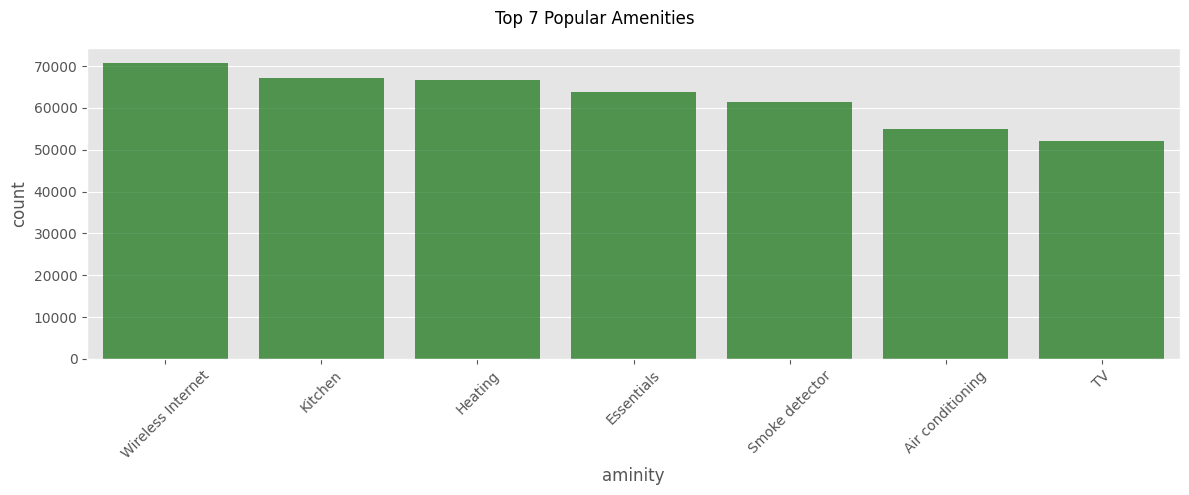

In [120]:
plt.figure(figsize=(12,5))
sns.barplot(data=top_7_aminity,x='aminity',y='count',color='green',alpha=0.7)
plt.xticks(rotation=45)
plt.suptitle('Top 7 Popular Amenities')
plt.tight_layout()

plt.savefig('Top 7 Popular Amenities.jpeg')
plt.show()

passing the top 7 aminities as features.

In [122]:
top_7_aminities=top_7_aminity['aminity'].values
print(top_7_aminities)

['Wireless Internet' 'Kitchen' 'Heating' 'Essentials' 'Smoke detector'
 'Air conditioning' 'TV']


In [123]:
def cleaned_am(am):
  k=am.replace('{','').replace('}','').replace('"','').split(',')
  return k


In [124]:
df['amenities']=df['amenities'].apply(cleaned_am)

Adding a Feature to show the total amenities for each row

In [125]:
df['total amenities']=df['amenities'].apply(len)

In [126]:
df['total amenities'].unique()

array([ 9, 15, 19, 12, 10, 21, 26, 13, 22, 17, 25,  7, 18, 24, 11, 29, 16,
       14, 44, 27, 28, 23,  8, 20,  1,  6, 43,  5,  2, 32, 41, 30,  3, 42,
       33, 31, 37, 38,  4, 39, 49, 36, 34, 40, 35, 57, 48, 45, 47, 51, 55,
       53, 46, 52, 58, 62, 50, 70, 61, 68, 54, 59, 60, 56, 78, 63, 64, 72,
       71, 86, 77, 69])

In [127]:
for feature in top_7_aminities:
    df[f'{feature}'] = df['amenities'].apply(lambda x: feature in x)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73579 entries, 0 to 74110
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               73579 non-null  float64
 1   property_type           73579 non-null  object 
 2   room_type               73579 non-null  object 
 3   amenities               73579 non-null  object 
 4   accommodates            73579 non-null  int64  
 5   bathrooms               73579 non-null  int64  
 6   bed_type                73579 non-null  object 
 7   cancellation_policy     73579 non-null  object 
 8   cleaning_fee            73579 non-null  bool   
 9   city                    73579 non-null  object 
 10  host_has_profile_pic    73579 non-null  object 
 11  host_identity_verified  73579 non-null  object 
 12  host_response_rate      73579 non-null  float64
 13  host_since              73579 non-null  int64  
 14  instant_bookable        73579 non-null  obj

In [129]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,bedrooms,beds,total amenities,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV
0,5.010635,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",3,1,Real Bed,strict,True,NYC,...,1.0,1.0,9,True,True,True,True,False,True,False
1,5.129899,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",7,1,Real Bed,strict,True,NYC,...,3.0,3.0,15,True,True,True,True,True,True,False
2,4.976734,Apartment,Entire home/apt,"[TV, Cable TV, Wireless Internet, Air conditio...",5,1,Real Bed,moderate,True,NYC,...,1.0,3.0,19,True,True,True,True,True,True,True
3,6.620073,House,Entire home/apt,"[TV, Cable TV, Internet, Wireless Internet, Ki...",4,1,Real Bed,flexible,True,SF,...,2.0,2.0,15,True,True,True,True,True,False,True
4,4.744932,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",2,1,Real Bed,moderate,True,DC,...,0.0,1.0,12,True,True,True,True,True,True,True


In [130]:
df.drop('amenities',axis=1,inplace=True)

### Label Encoding the boolian and object data types

In [131]:
bool_and_object_cols = df.select_dtypes(include=['bool','object']).columns
bool_and_object_cols

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable', 'neighbourhood',
       'Wireless Internet', 'Kitchen', 'Heating', 'Essentials',
       'Smoke detector', 'Air conditioning', 'TV'],
      dtype='object')

In [132]:
from sklearn.preprocessing import LabelEncoder

Label Encoding and also mapping the encoded values to later use in streamlit.

In [133]:
encoders = {}
mappings = {}
classes={}

for col in bool_and_object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
    classes[col]=le.classes_
    mappings[col] = {label: id for id, label in enumerate(le.classes_)}


for col, mapping in mappings.items():
    print(f"{col}: {mapping}")

property_type: {'Apartment': 0, 'Bed & Breakfast': 1, 'Boat': 2, 'Boutique hotel': 3, 'Bungalow': 4, 'Cabin': 5, 'Camper/RV': 6, 'Casa particular': 7, 'Castle': 8, 'Cave': 9, 'Chalet': 10, 'Condominium': 11, 'Dorm': 12, 'Earth House': 13, 'Guest suite': 14, 'Guesthouse': 15, 'Hostel': 16, 'House': 17, 'Hut': 18, 'In-law': 19, 'Island': 20, 'Lighthouse': 21, 'Loft': 22, 'Other': 23, 'Serviced apartment': 24, 'Tent': 25, 'Timeshare': 26, 'Tipi': 27, 'Townhouse': 28, 'Train': 29, 'Treehouse': 30, 'Vacation home': 31, 'Villa': 32, 'Yurt': 33}
room_type: {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}
bed_type: {'Airbed': 0, 'Couch': 1, 'Futon': 2, 'Pull-out Sofa': 3, 'Real Bed': 4}
cancellation_policy: {'flexible': 0, 'moderate': 1, 'strict': 2, 'super_strict_30': 3, 'super_strict_60': 4}
cleaning_fee: {False: 0, True: 1}
city: {'Boston': 0, 'Chicago': 1, 'DC': 2, 'LA': 3, 'NYC': 4, 'SF': 5}
host_has_profile_pic: {'f': 0, 't': 1}
host_identity_verified: {'f': 0, 't': 1}
instant

In [134]:
print(mappings['property_type'])

{'Apartment': 0, 'Bed & Breakfast': 1, 'Boat': 2, 'Boutique hotel': 3, 'Bungalow': 4, 'Cabin': 5, 'Camper/RV': 6, 'Casa particular': 7, 'Castle': 8, 'Cave': 9, 'Chalet': 10, 'Condominium': 11, 'Dorm': 12, 'Earth House': 13, 'Guest suite': 14, 'Guesthouse': 15, 'Hostel': 16, 'House': 17, 'Hut': 18, 'In-law': 19, 'Island': 20, 'Lighthouse': 21, 'Loft': 22, 'Other': 23, 'Serviced apartment': 24, 'Tent': 25, 'Timeshare': 26, 'Tipi': 27, 'Townhouse': 28, 'Train': 29, 'Treehouse': 30, 'Vacation home': 31, 'Villa': 32, 'Yurt': 33}


In [135]:
classes[col]

array([False,  True])

In [136]:
df['review_scores_rating'].unique()

array([100.,  93.,  92.,  40.,  97.,  99.,  90.,  89.,  91.,  88.,  86.,
        72.,  98.,  95.,  96.,  84.,  80.,  94.,  87.,  85.,  70.,  60.,
        75.,  20.,  76.,  83.,  82.,  78.,  73.,  55.,  81.,  67.,  71.,
        77.,  79.,  47.,  74.,  68.,  66.,  63.,  50.,  53.,  65.,  64.,
        27.,  69.,  30.,  58.,  35.,  62.,  49.,  57.,  54.,  56.])

In [137]:
df.dtypes

log_price                 float64
property_type               int64
room_type                   int64
accommodates                int64
bathrooms                   int64
bed_type                    int64
cancellation_policy         int64
cleaning_fee                int64
city                        int64
host_has_profile_pic        int64
host_identity_verified      int64
host_response_rate        float64
host_since                  int64
instant_bookable            int64
latitude                  float64
longitude                 float64
neighbourhood               int64
number_of_reviews           int64
review_scores_rating      float64
zipcode                   float64
bedrooms                  float64
beds                      float64
total amenities             int64
Wireless Internet           int64
Kitchen                     int64
Heating                     int64
Essentials                  int64
Smoke detector              int64
Air conditioning            int64
TV            

Checking the correlation with the target

In [138]:
df.corr()['log_price'].sort_values(ascending=False)

log_price                 1.000000
accommodates              0.568098
bedrooms                  0.473524
beds                      0.442349
bathrooms                 0.346812
TV                        0.264027
total amenities           0.194741
cancellation_policy       0.132689
cleaning_fee              0.111367
Heating                   0.104868
Kitchen                   0.101323
review_scores_rating      0.098469
bed_type                  0.093882
neighbourhood             0.068099
Air conditioning          0.053215
Essentials                0.053075
property_type             0.048962
Smoke detector            0.046407
Wireless Internet         0.035064
zipcode                   0.034609
city                      0.031378
host_identity_verified    0.023667
host_response_rate        0.001369
latitude                 -0.002191
host_has_profile_pic     -0.013220
number_of_reviews        -0.032019
instant_bookable         -0.043912
longitude                -0.047708
host_since          

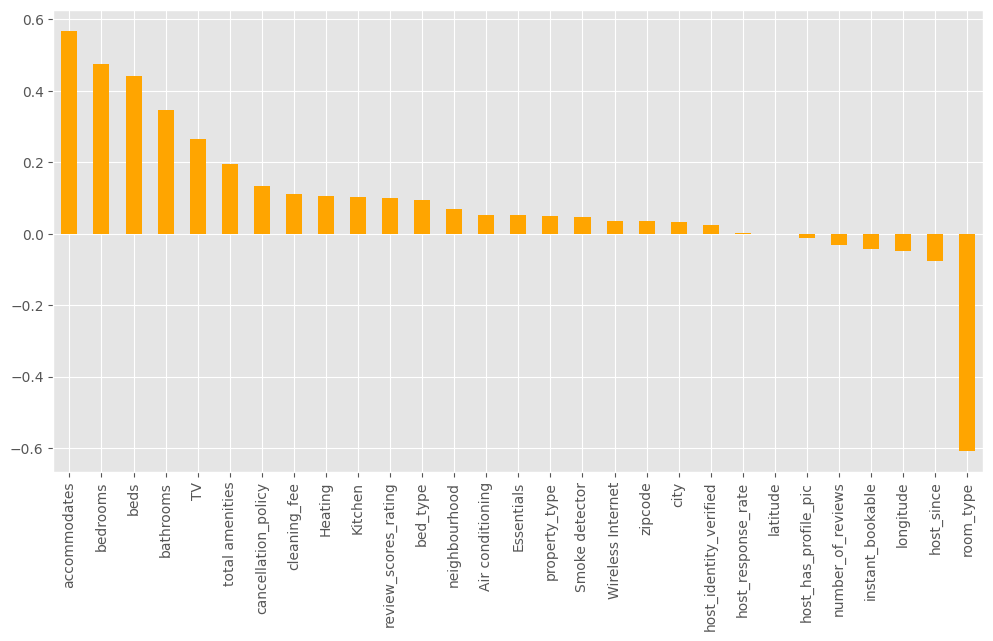

In [139]:
plt.figure(figsize=(12,6))
df.corr()['log_price'].sort_values(ascending=False)[1:].plot(kind='bar',color='orange')
plt.show()

### Initial training without feature selection

In [140]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [141]:
X=df.drop('log_price',axis=1)
y=df['log_price']

### Scaling and splitting

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [144]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBRegressor' : XGBRegressor()
}

In [145]:
r2_list=[]
mse_list=[]
kf_list=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    kf = cross_val_score(estimator=model, X=X_train, y=y_train, cv=3)
    r2_list.append(r2)
    mse_list.append(mse)
    kf_list.append(kf.mean())

In [146]:
score_comparison = pd.DataFrame({'Model': models.keys(), 'R2-Score': r2_list, 'MSE':mse_list, 'K-Fold': kf_list})
score_comparison

,Model,R2-Score,MSE,K-Fold
0,Linear Regression,0.557057,0.225329,0.565525
1,Ridge Regression,0.557036,0.225340,0.565514
2,Random Forest,0.688113,0.158659,0.697078
3,Gradient Boosting,0.658221,0.173866,0.676349
4,XGBRegressor,0.700647,0.152284,0.708262


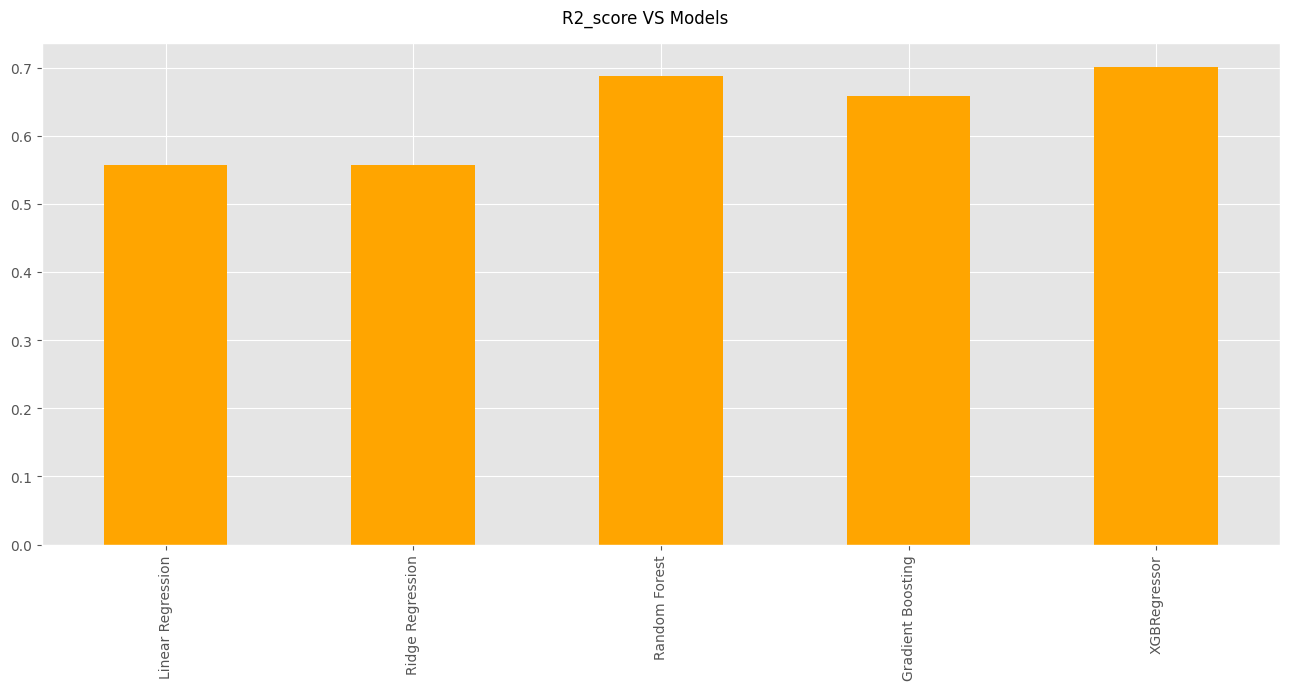

In [147]:
plt.figure(figsize=(13,7))
score_comparison['R2-Score'].plot(kind='bar',color='orange')
plt.suptitle('R2_score VS Models')
plt.xticks(ticks=range(0,5),labels=models.keys(),rotation=90)
plt.tight_layout()
plt.show()

Since XGBRegressor performed the best, using XGBRegressor as the model to predict the prices.

### Hyper Parameter Tuning

In [148]:
from sklearn.model_selection import  GridSearchCV
xgb=XGBRegressor()

In [149]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

In [150]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

In [151]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [152]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [153]:
best_model = grid_search.best_estimator_

In [154]:
y_pred = best_model.predict(X_test)

In [155]:
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2: ',r2)
print('MSE:',mse)

R2:  0.7040359929152133
MSE: 0.15055943766527827


Hyper Parameter Tuning only slightly improved the performance of the model.

### Feature Selection

In [156]:
from sklearn.feature_selection import RFE


In [157]:
rfe = RFE(best_model, n_features_to_select=15)

In [158]:
rfe = rfe.fit(X, y)

In [159]:
rfe.get_feature_names_out()

array(['property_type', 'room_type', 'accommodates', 'bathrooms',
       'cleaning_fee', 'city', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'Kitchen', 'Air conditioning', 'TV'], dtype=object)

In [160]:
X_selected = X[rfe.get_feature_names_out()]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_selected.values, y, test_size=0.2, random_state=42)

In [162]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2: ',r2)
print('MSE:',mse)


R2:  0.6984376188646944
MSE: 0.15340737872807297


Feature selection did not improve the performance of the model

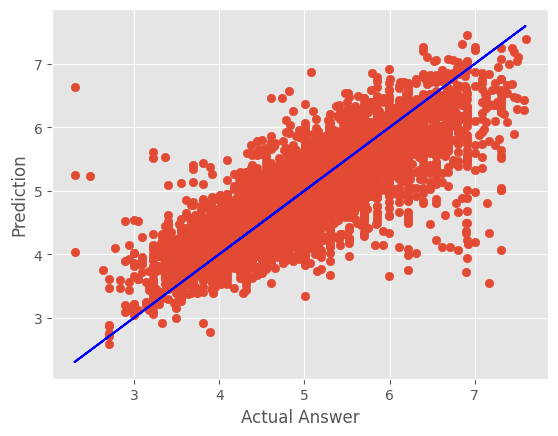

In [163]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Answer')
plt.ylabel('Prediction')
plt.plot(y_test,y_test,color='blue')
plt.show()

Creating a Prediction Function

In [164]:
def prediction(input):
  result=best_model.predict([input])
  return result


In [165]:
example_pred=prediction(X_selected.iloc[0].values)

In [166]:
print('Predicted:',example_pred[0],'\nActual:',y_train[0])

Predicted: 4.9426565 
Actual: 5.010635294096256


In [167]:
import pickle
pickle.dump(xgb,open('creditcard_eligiblity.sav','wb'))